# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [18]:
# Imports

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Carrega o dataset
df = pd.read_csv('previsao_de_renda.csv')

In [20]:
# Shape
df.shape

(15000, 16)

In [21]:
# Colunas
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [22]:
# Amostra dos dados
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [23]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [24]:
# Analisando variáveis númericas: qtd_filhos, idade, tempo_emprego, qt_pessoas_residencia e renda.
df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


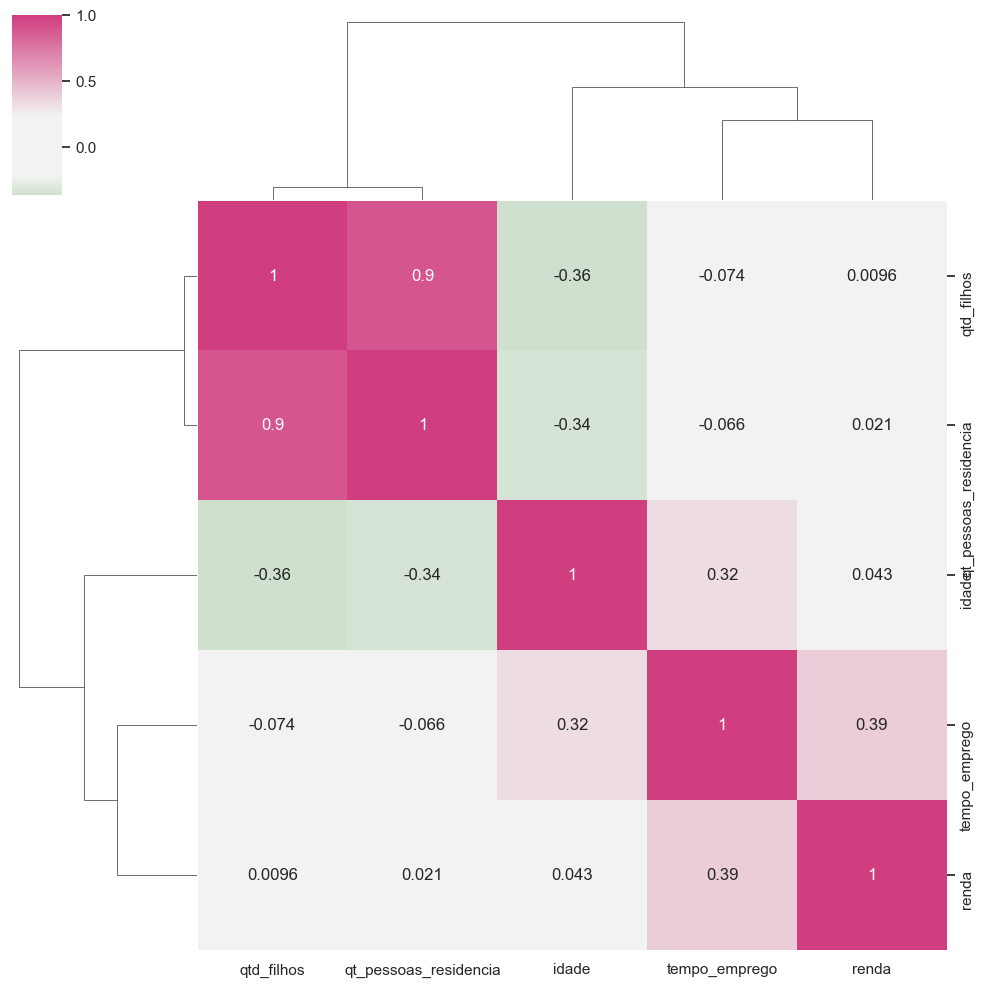

In [25]:
renda_cmap = sns.diverging_palette(h_neg=125,h_pos=350,as_cmap=True,sep=60,center='light')
sns.clustermap(df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].corr(),
               figsize=(10,10),center=0, annot=True,cmap=renda_cmap)

. Apartir do gráfico gerado, a correlação mais presente é de quantidade de filhos com quantidade de pessoas na residência. 
. Outra relação percebida no gráfico é a idade com tempo de emprego


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [26]:
sns.set(style="darkgrid")

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

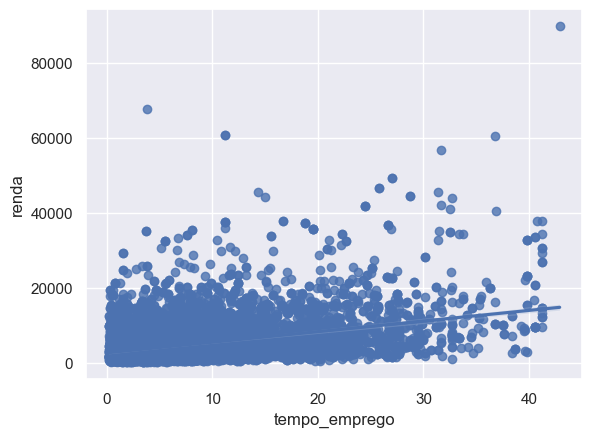

In [27]:
sns.regplot(data = df, x ='tempo_emprego', y ='renda')

<AxesSubplot:xlabel='idade', ylabel='renda'>

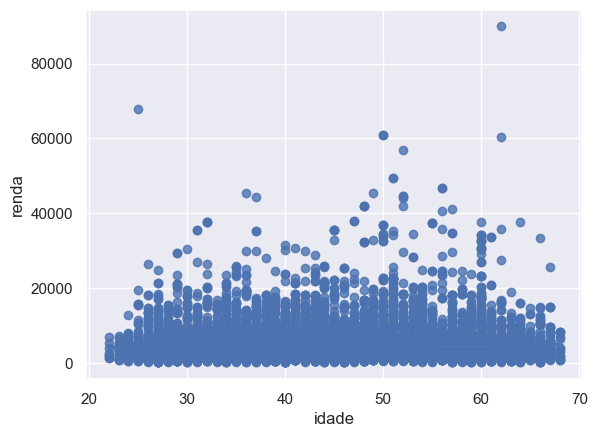

In [28]:
sns.regplot(data = df, x='idade', y='renda')

3) Na su aopinião, há outliers na variável renda?

Text(0.5, 1.0, 'Renda com Outliers')

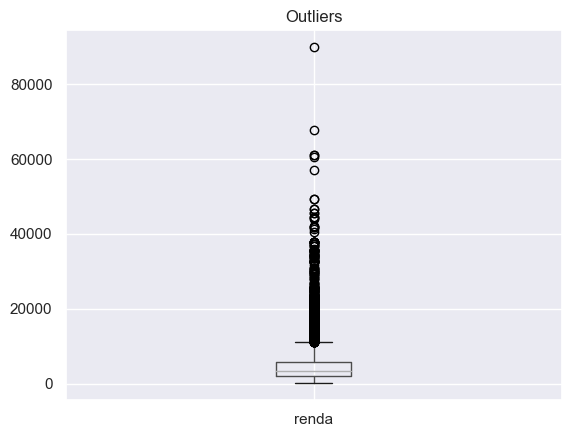

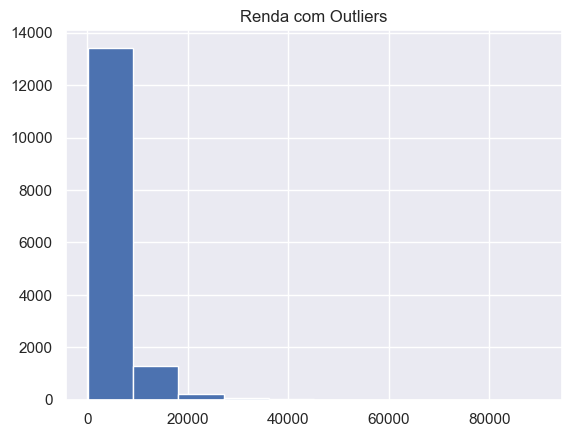

In [37]:
df.boxplot(['renda'])
plt.title('Outliers')
df.hist(['renda'])
plt.title('Renda com Outliers')

Text(0.5, 1.0, 'Com Outliers')

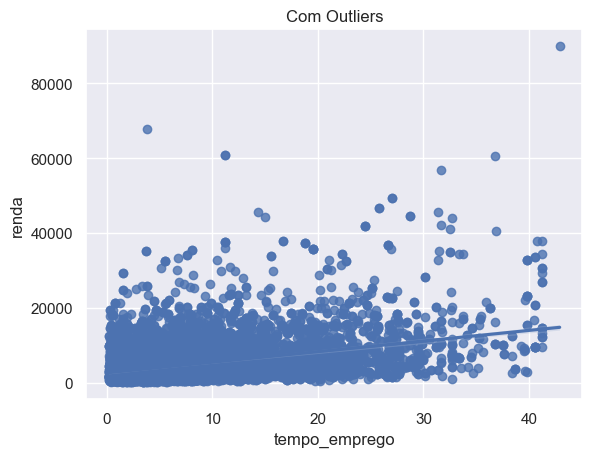

In [38]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = df)
plt.title('Com Outliers')

In [41]:
valor = df['renda']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

Text(0.5, 1.0, 'Renda sem Outliers')

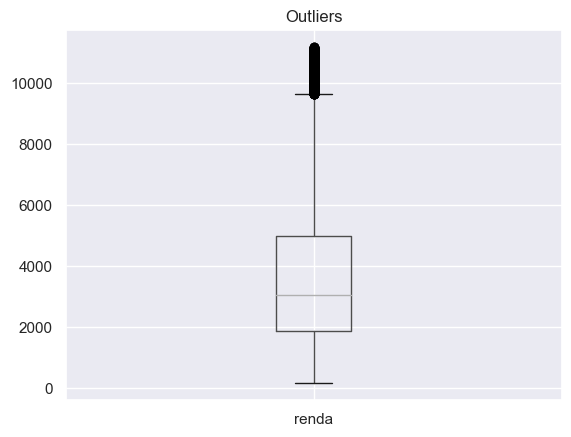

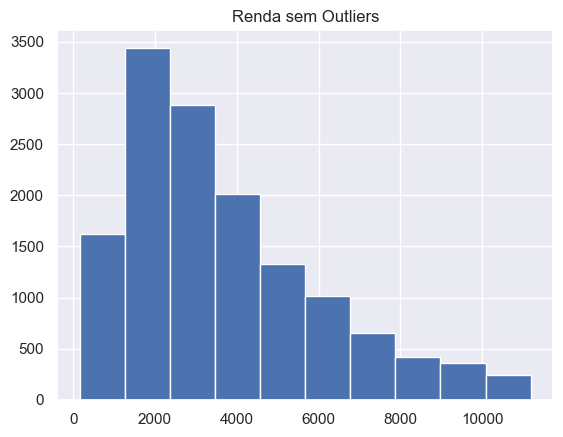

In [42]:
selecao = (valor>= limite_inferior) & (valor <= limite_superior)
df_new = df[selecao]
df_new.boxplot(['renda'])
plt.title('Outliers')
df_new.hist(['renda'])
plt.title('Renda sem Outliers')

Text(0.5, 1.0, 'Sem Outliers')

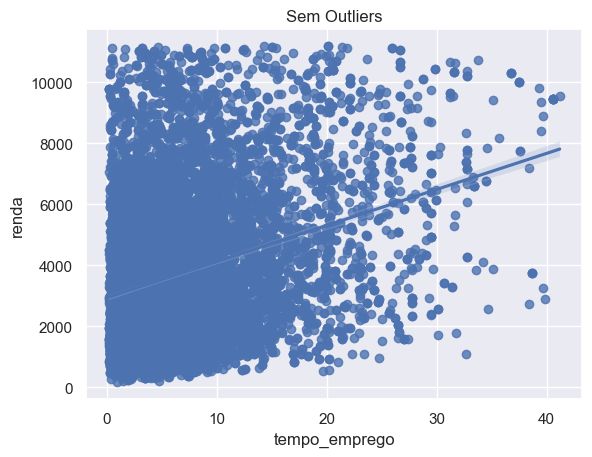

In [43]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = df_new)
plt.title('Sem Outliers')

. Sim, Confirmada a existência de outliers, podemos observar alguns dados de renda mais dispersos.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [44]:
df['log_renda'] = np.log(df['renda'])

In [45]:
df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda']].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.036267
log_renda,0.023743,0.024712,0.379556,0.036267,1.000000


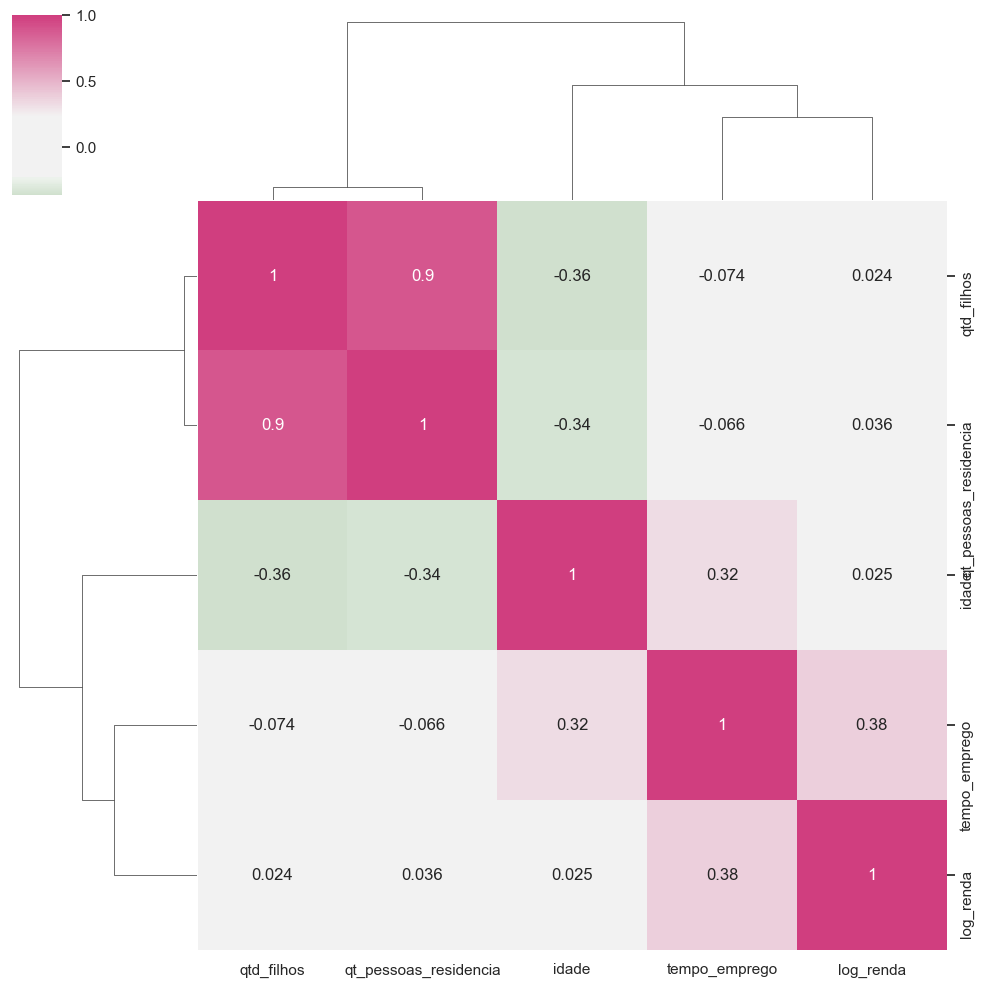

In [46]:
renda_cmap = sns.diverging_palette(h_neg=125,h_pos=350,as_cmap=True,sep=60,center='light')
sns.clustermap(df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda']].corr(),
               figsize=(10,10),center=0, annot=True,cmap=renda_cmap)

<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

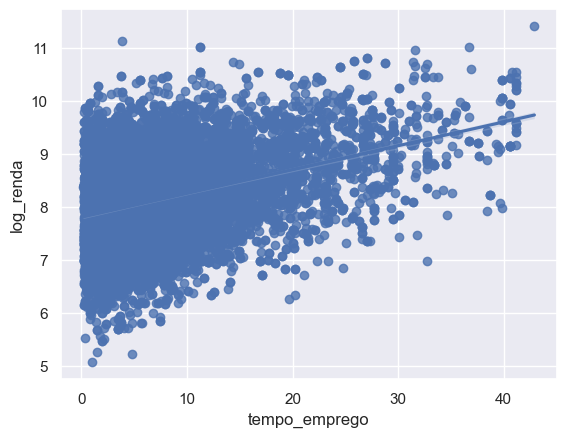

In [47]:
# Depois de calcular o logaritmo
sns.regplot(x='tempo_emprego', y='log_renda', data = df)

<AxesSubplot:xlabel='idade', ylabel='log_renda'>

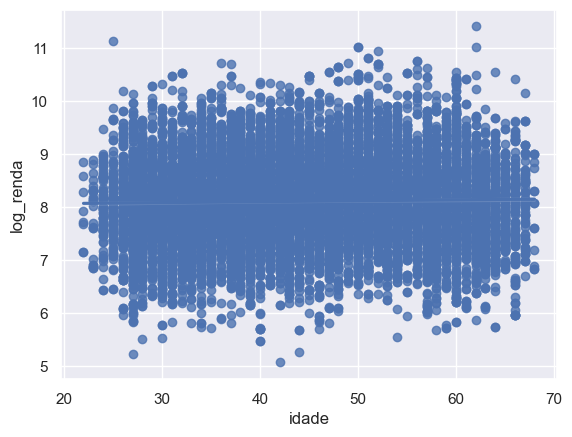

In [48]:
# Depois de calcular o logaritmo
sns.regplot(x = 'idade', y = 'log_renda', data = df)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

. Houve pouca alteração na análise, se mantendo inconclusiva em relação a uma correlação direta entre os valores.